<a href="https://colab.research.google.com/github/Stefaniazl/venta-de-autos-usados/blob/main/Proyecto_Final_Stefania_Zapata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vehiculos de Segunda mano en venta**

Un automóvil de **segunda mano**, usado o de ocasión, es un vehículo que anteriormente perteneció a uno o más dueños. Este tipo de vehículos se pueden encontrar tanto de particulares como en outlets, franquicia e incluso concesionarios de coches independientes, empresas de alquiler de vehículos, casas de subastas, etc. Algunos vendedores ofrecen precios no negociables, certificado de uso e incluso garantías.

En España, el sector de la automoción representa el 10% del PIB (producto interior bruto) y el 18% del total de las exportaciones. Además, proporciona cerca de 2 millones de puestos de trabajo, a lo largo de toda la geografía nacional, siendo un importante generador de empleo en muchas regiones, más allá de las grandes ciudades.

### **Problema comercial**

Tras haber pasado la que quizás haya podido ser la crisis económica más dura en España, las ventas de vehículos de segunda mano, se han visto alteradas desde el punto de vista de la antigüedad de los vehículos, principal característica que define al mercado de vehículos de ocasión, dándose grandes diferencias y comportamientos según el tramo de edad que se analice.

**Buscamos:**

* Determinar el precio del vehiculo de acuerdo a sus características.
* Top 10 de modelos de coches en venta (marca)
* Fecha media de fabricación de los vehiculos por marca.
* ¿Cuál es el precio medio de venta?

### **Fuente de información**

Para trabajar en este proyecto hare uso de la base de Datos que se encuentra disponible en [Kaggle](https://www.kaggle.com/datasets/datamarket/venta-de-coches)

Este Dataset cuenta con informacion que utilizaremos en las siguientes visualizaciones entre ellas podemos encontrar: la provincia en la que se encuentra el anuncinate del vehiculo, el precio del vehiculo, el modelo, el kilometraje y el año en que fue fabricado.

Las características de este conjunto de datos son las siguientes:

*   **Volumen estimado:** 300.000 registros cada día
*   **Histórico:** desde noviembre de 2020 hasta 2021

### **Documentación de las columnas**

**Color:** Color del vehículo.

**currency:** Moneda en la que está definido el precio del vehículo (Euro).

**date:** Fecha de extracción de la información.

**dealer_address:** Dirección del anunciante.

**dealer_city:** Ciudad del anunciante.

**dealer_country_code:** Código de país del anunciante

**dealer_description:** Descripción del anunciante.

**dealer_is_professional:** Determina si el anunciante es o no profesional.

**dealer_name:** Vendedor del vehículo (Particular o concesionario).

**dealer_registered_at:** Fecha de registro del anunciante en la plataforma.

**dealer_website:** Página web del anunciante.

**dealer_zip_code:** Código postal del anunciante.

**description:** Descripción presente en el anuncio del vehículo.

**doors:** Número de puertas del vehículo.

**fuel:** Tipo de combustible del vehículo (diésel, gasolina, eléctrico, híbrido).

**is_professional:** Indica si el vendedor es profesional (un concesionario).

**kms:** Kilometraje del vehículo.

**location:** Ciudad en la que se ha publicado el anuncio.

**make:** Marca del vehículo.

**model:** Modelo del vehículo.

**photos:** Número de fotos del vehículo disponibles en el anuncio.

**power:** Potencia del vehículo.

**price:** Precio de venta del vehículo.

**publish_date:** Fecha de publicación del anuncio.

**shift:** Tipo de cambio (Automático/Manual).

**update_date:** Fecha de actualización del anuncio.

**vehicle_type:** Tipo de vehículo: coche, moto...

**version:** Versión del vehículo.

**year:** Año de fabricación del vehículo.

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# **Cargamos librerías**

### **Para tratar los datos**

---



In [ ]:
import pandas as pd;
import pandas_profiling;
import plotly.express as px;
import matplotlib.pyplot as plt;
import seaborn as sns;
import numpy as np;
import missingno as msno;
import scipy as sp;
from statistics import mean;
from wordcloud import WordCloud;


### **Procesado y modelado**

---



In [74]:
import time
from scipy.optimize import minimize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


# **Cargar datos**

In [4]:
# Importamos el archivo csv con el que trabajaremos
from google.colab import files

uploaded = files.upload()


Saving coches-sm.csv to coches-sm.csv


# **Visualización de datos y nulos**

In [5]:
#Visualizamos el Dataset
df = pd.read_csv('coches-sm.csv')
df

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,730210734bfbe1d3df878d5df71246f2,9881bcdd5a0ad4733037b3fb25e69c3a,HYUNDAI,i30,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.,18490,16490.0,Gasolina,2018.0,47000,...,5,Automático,Gris / Plata,26,True,Flexicar Málaga,Málaga,Spain,2020-11-24 19:59:52,2021-01-15 00:00:00
49996,732b04fb47dd9559dbdcd099c5af484e,9881bcdd5a0ad4733037b3fb25e69c3a,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,13551.0,Diésel,2015.0,68750,...,2,Manual,KNG Gris Casiopea (metalizado),30,True,Ocasion Plus,Málaga,Spain,2021-01-13 17:02:41,2021-01-15 00:00:00
49997,c10afb53957fb8012707239bdfa66018,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,9000.0,Gasolina,2019.0,21422,...,5,Manual,Gris / Plata,17,True,Psa Retail Huelva,Huelva,Spain,2021-01-08 16:47:24,2021-01-15 00:00:00
49998,f74363a6688ba11b71b4d980a959b8d3,9881bcdd5a0ad4733037b3fb25e69c3a,AUDI,RS4,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.,47900,NaN,Gasolina,2013.0,47900,...,5,Automático,Gris / Plata (Antracita),20,True,Codigocar Lugo,Lugo,Spain,2021-01-13 16:22:53,2021-01-15 00:00:00


In [6]:
print(f'\tEl dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas. \n')

	El dataset tiene 50000 filas y 21 columnas. 



Con la visualizacion anterior podemos apreciar que contamos con **50000 filas** y **21 columnas** con distinta información que seran usados en el proyecto.




Vemos variables, el tipo de dato (numéricas o de texto) y la cantidad de nulls que poseen.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

In [ ]:
df_dtypes_count = pd.DataFrame(df.dtypes.value_counts())
print(df_dtypes_count)

          0
object   13
int64     4
float64   3
bool      1


In [ ]:
df.isnull().sum()

url                    0
company                0
make                   2
model                  5
version                0
price                  0
price_financed     26437
fuel                  46
year                   2
kms                    0
power               8528
doors                  0
shift                111
color                594
photos                 0
is_professional        0
dealer                 0
province               6
country                0
publish_date           0
insert_date            0
dtype: int64

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Columnas': df.columns,
                                 'Porcentaje_Missing': percent_missing})
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False)

,Columnas,Porcentaje_Missing
price_financed,price_financed,52.874
power,power,17.056
color,color,1.188
shift,shift,0.222
fuel,fuel,0.092
province,province,0.012
model,model,0.010
make,make,0.004
year,year,0.004
photos,photos,0.000


Podemos ver en los datos anteriores que tenemos un porcentaje de faltantes con un  **52%** en lo que corresponde a precio de financiamiento y un **17%** en power del vehiculo publicado por lo cual tomando en cuanta los datos que necesito para trabajar el modelo pensado eliminare la columna que afectaria el modelo ya que tiene la mitad de datos faltantes.

Con el siguiente gráfico de la librería missingno podremos visualizar donde se encuentran la mayor cantidad de datos nulos para asi poder tomar una decisión al eliminar algunos datos que no aportaran información para nuestro futuro modelo.

<Axes: >

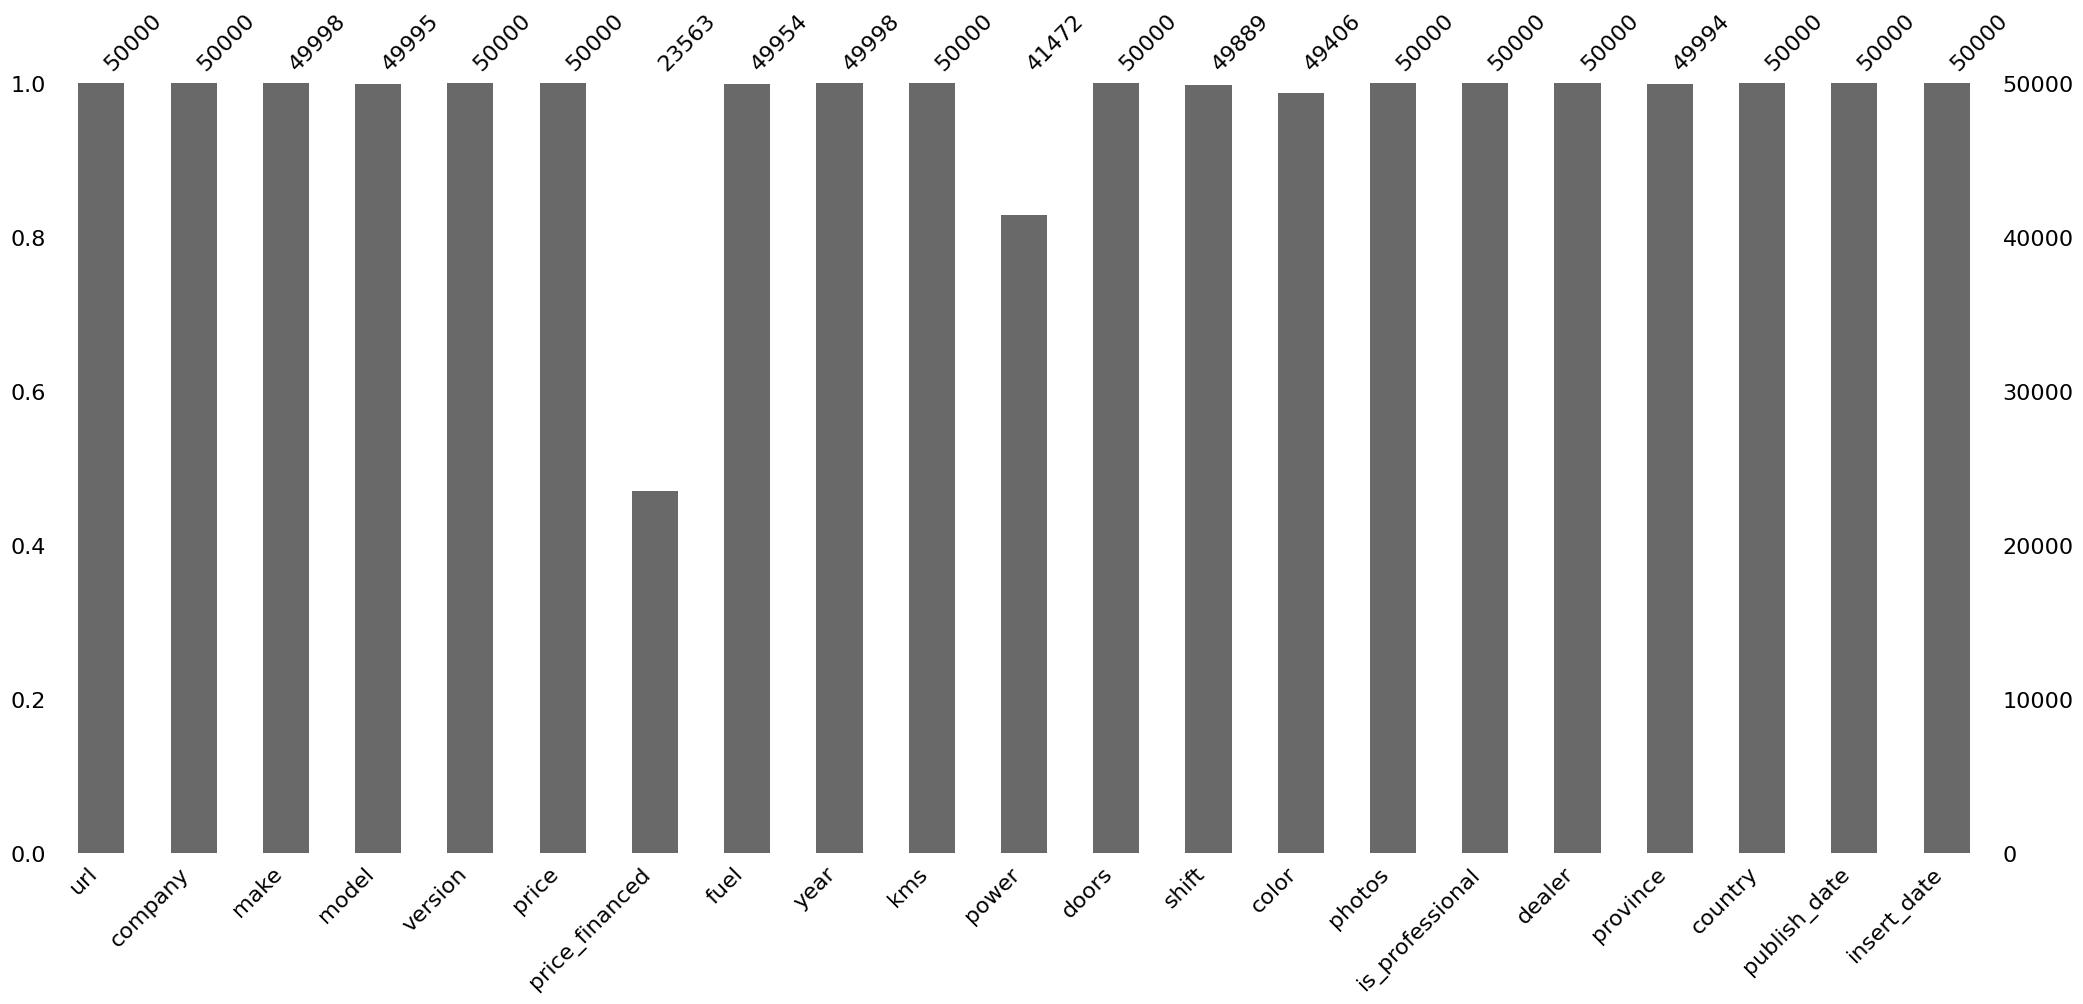

In [ ]:
msno.bar(df)

Las variables mas relevantes para estimar el precio de los autos son:

* Make
* Model
* Version
* Year
* Kms
* Shift
* Fuel
* Doors
* is_professional



Lo siguiente es que realizare una copia del dataFrame donde conservare todas las variables anteriormente mencionadas que son las que usare para el modelo.

In [7]:
columnas_a_usar= ['make', 'model', 'version', 'price', 'year', 'kms', 'shift', 'fuel', 'doors', 'is_professional']

df_copy = df[columnas_a_usar].copy()

In [8]:
print(f'\tEl dataset tiene {df_copy.shape[0]} filas y {df_copy.shape[1]} columnas. \n')

	El dataset tiene 50000 filas y 10 columnas. 



In [ ]:
pd.DataFrame(df.describe())

,price,price_financed,year,kms,power,doors,photos
count,50000.000000,23563.000000,49998.000000,5.000000e+04,41472.000000,50000.000000,50000.000000
mean,15166.270260,18480.029283,2012.311032,1.163591e+05,146.396388,4.505380,16.199120
std,16485.669747,13389.800738,6.677760,1.072921e+05,71.283964,0.868001,12.422882
min,300.000000,700.000000,1970.000000,0.000000e+00,29.000000,2.000000,0.000000
25%,5500.000000,10790.000000,2007.000000,3.830000e+04,109.000000,4.000000,7.000000
50%,11750.000000,15500.000000,2015.000000,9.999900e+04,130.000000,5.000000,13.000000
75%,19800.000000,21995.000000,2018.000000,1.749000e+05,163.000000,5.000000,23.000000
max,549900.000000,428999.000000,2021.000000,5.000000e+06,800.000000,5.000000,54.000000


In [ ]:
df_copy.isnull().sum()

make                 2
model                5
version              0
price                0
year                 2
kms                  0
shift              111
fuel                46
doors                0
is_professional      0
dtype: int64

Despues de crear un nuevo data set vamos a seguir explorando, creando y modificando los datos obtenidos. Podemos ver con la informacion anterior que el data set guarda datos nulos, vamos a eliminarlos para asi poder tener un data set completo despues de dejar solo las marcas de vehiculos que vamos a utilizar.

A continuación veremos un **Top 10** de las marcas mas vendidas y estas las usaremos para encontrar la respuesta a nuestra pregunta inicial.

# ✅ Top 10 de modelos de coches en venta (marca)

In [ ]:
marcas = df_copy.groupby("make")

marcas.count().sort_values(by='model', ascending=False).head(10)

,model,version,price,year,kms,shift,fuel,doors,is_professional
make,,,,,,,,,
VOLKSWAGEN,4624,4624,4624,4624,4624,4614,4623,4624,4624
BMW,4510,4510,4510,4510,4510,4502,4507,4510,4510
MERCEDES-BENZ,4227,4227,4227,4227,4227,4221,4223,4227,4227
AUDI,3745,3745,3745,3745,3745,3737,3745,3745,3745
PEUGEOT,3314,3314,3314,3314,3314,3298,3311,3314,3314
RENAULT,3127,3127,3127,3127,3127,3121,3124,3127,3127
FORD,3116,3116,3116,3116,3116,3111,3114,3116,3116
OPEL,2924,2924,2924,2924,2924,2920,2924,2924,2924
CITROEN,2855,2855,2855,2855,2855,2843,2855,2855,2855


A partir de este Top 10 de los autos mas publicados crearemos un Data Frame mask solo con estos modelos para reducir la cantidad de datos para entrenar el modelo.

In [9]:
mask = (df_copy['make'].isin(['VOLKSWAGEN', 'BMW', 'MERCEDES-BENZ', 'AUDI', 'PEUGEOT', 'RENAULT', 'FORD', 'OPEL', 'CITROEN', 'SEAT']))
df_1 = df_copy[mask]

df_1

,make,model,version,price,year,kms,shift,fuel,doors,is_professional
0,SEAT,Toledo,SEAT Toledo 4p.,950,2000.0,227000,Manual,Diésel,4,False
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,2017.0,50071,Manual,Gasolina,5,True
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,2016.0,103000,Manual,Diésel,4,True
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,2014.0,120000,Manual,Diésel,4,True
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,2017.0,107000,Manual,Diésel,2,True
...,...,...,...,...,...,...,...,...,...,...
49994,SEAT,León,SEAT Leon ST 1.6 TDI 85kW 115CV StSp Style Ed 5p.,18590,2019.0,21153,Manual,Diésel,5,True
49996,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,2015.0,68750,Manual,Diésel,2,True
49997,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,2019.0,21422,Manual,Gasolina,5,True
49998,AUDI,RS4,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.,47900,2013.0,47900,Automático,Gasolina,5,True


In [10]:
print(f'\tEl dataset tiene {df_1.shape[0]} filas y {df_1.shape[1]} columnas. \n')

	El dataset tiene 35046 filas y 10 columnas. 



In [ ]:
df_1.isnull().sum()

make                0
model               5
version             0
price               0
year                1
kms                 0
shift              80
fuel               18
doors               0
is_professional     0
dtype: int64

In [11]:
df_a = df_1.dropna(axis=0, inplace=False)

Ahora no tenemos ningun dato faltante. Continuamos con la exploracion de los datos teniendo en cuenta que ahora contamos con **10 Columnas** y ningun dato nulo. Tambien vamos a realizar un cambio del tipo de dato de la **variable año** ya que esta se encuentra como **str** y necesitamos modificarla a **int** para asi realizar conteos respecto al año de los vehivulos.

In [ ]:
df_a['year'] = df_a['year'].astype(int)

#**Data Wrangling**

Se realizo una examinacion de los datos, y se han realizado los ajustes de limpieza necesarios para dejarlos listos para análisis.

Detallaremos los cambios a continuación:<br>
* Se conservaron 10 columnas en una copia del data set original
* Se detectaron y eliminaron datos nulos en el resto de las columnas
* Se realizo un cambio en el tipo de datos en la variable **Year** de *Float a int* para poder realizar conteo y sacar promedio del mismo.
* Se mantuvo el df original y se realizo una copia para trabajar las visualizaciones con los datos limpios
* Realizamos una segunda copia para los algoritmos de aprendizaje automático.

El conjunto de datos resultantes tiene **35.046** publicaciones de vehiculos y **10 columnas**.

Podemos ver que el valor maximo de venta es de **$375.000** y el minimo de **300**

Ahora vamos a realizar nuevas variables donde vamos a discretizar los datos para reducir la complejidad:

**Reducimos la cantidad de datos sobre los Kilometros de los autos a:**

* Menos de 50.000 km: **Muy bajo**
* Entre 50.000 y 129.999 km: **Bajo**
* Entre 130.000 y 249.999 km: **Medio**
* Entre 250.000 y 379.999 km: **Alto**
* Mas de 380.000 km: **Muy alto**

In [ ]:
def recorrido(row):
    if row['kms'] < 50000:
        return 'muy bajo'
    elif row['kms'] >= 50000 and row['kms'] <= 130000:
        return 'bajo'
    elif row['kms'] > 130000 and row['kms'] <= 250000:
        return 'medio'
    elif row['kms'] > 250000 and row['kms'] <= 380000:
        return 'alto'
    else:
        return 'muy alto'

# Crear nueva columna "movimiento"
df_a['recorrido'] = df_a.apply(recorrido, axis=1)

**Reducimos la cantidad de datos sobre el año de Fabricación de los autos a:**

* 1970 - 1990: **6**
* 1991 - 1999: **5**
* 2000 - 2005: **4**
* 2006 - 2010: **3**
* 2011 - 2015: **2**
* 2016 - 2021: **1**


In [ ]:
def ano_discretizado(row):
  if row['year'] < 1990:
        return '6'
  elif row['year'] >= 1990 and row['year'] <= 1999:
        return '5'
  elif row['year'] > 1999 and row['year'] <= 2005:
        return '4'
  elif row['year'] > 2005 and row['year'] <= 2010:
        return '3'
  elif row['year'] > 2010 and row['year'] <= 2015:
        return '2'
  else:
        return '1'

# Crear nueva columna "movimiento"
df_a['ano_discretizado'] = df_a.apply(ano_discretizado, axis=1)

Despues de crear las nuevas variables voy a realizar un LabelEncoding para asi poder utilizar mis variables categoricas, que serian:

* Make
* Model
* Version
* Shift
* Fuel
* Recorrido
* Ano_discretizado

Y tambien usaremos un get_dummies para la variable Booleana:

* is_professional

In [ ]:
encoder = LabelEncoder()

df_a['make_encoded'] = encoder.fit_transform(df_a['make'])
df_a['model_encoded'] = encoder.fit_transform(df_a['model'])
df_a['version_encoded'] = encoder.fit_transform(df_a['version'])
df_a['shift_encoded'] = encoder.fit_transform(df_a['shift'])
df_a['fuel_encoded'] = encoder.fit_transform(df_a['fuel'])
df_a['recorrido_encoded'] = encoder.fit_transform(df_a['recorrido'])
df_a['ano_discretizado_encoded'] = encoder.fit_transform(df_a['ano_discretizado'])

In [17]:
df_encoded = pd.get_dummies(df_a, columns=['is_professional'], prefix=['is_professional'])
df_encoded

,make,model,version,price,year,kms,shift,fuel,doors,recorrido,ano_discretizado,make_encoded,model_encoded,version_encoded,shift_encoded,fuel_encoded,recorrido_encoded,ano_discretizado_encoded,is_professional_False,is_professional_True
0,SEAT,Toledo,SEAT Toledo 4p.,950,2000,227000,Manual,Diésel,4,medio,4,8,329,9602,1,0,2,3,1,0
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,2017,50071,Manual,Gasolina,5,bajo,1,2,92,2195,1,4,1,0,0,1
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,2016,103000,Manual,Diésel,4,bajo,1,3,337,4053,1,0,1,0,0,1
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,2014,120000,Manual,Diésel,4,bajo,2,9,119,9847,1,0,1,1,0,1
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,2017,107000,Manual,Diésel,2,bajo,1,3,336,4014,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,SEAT,León,SEAT Leon ST 1.6 TDI 85kW 115CV StSp Style Ed 5p.,18590,2019,21153,Manual,Diésel,5,muy bajo,1,8,234,9492,1,0,4,0,0,1
49996,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,2015,68750,Manual,Diésel,2,bajo,2,7,232,8010,1,0,1,1,0,1
49997,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,2019,21422,Manual,Gasolina,5,muy bajo,1,6,5,6256,1,4,4,0,0,1
49998,AUDI,RS4,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.,47900,2013,47900,Automático,Gasolina,5,muy bajo,2,0,282,1381,0,4,4,1,0,1


Voy a eliminar las columnas que discretice para asi tener solo las que seran usadas en el modelo.

In [18]:
df_encoded = df_encoded.drop(['kms', 'year'], axis=1)

# **Analisis y limpieza de Outliers**


# ✅ ¿Cuál es el precio medio de venta?

En el siguiente utilizare el modulo **statistics** para asi poder apreciar mejor el promedio sobre el precio de venta de los vehiculos publicados. Y podemos ver que este se encuentra sobre los **14.225 Euros**.

In [19]:
mean(df_encoded['price'])

14224.624606490755

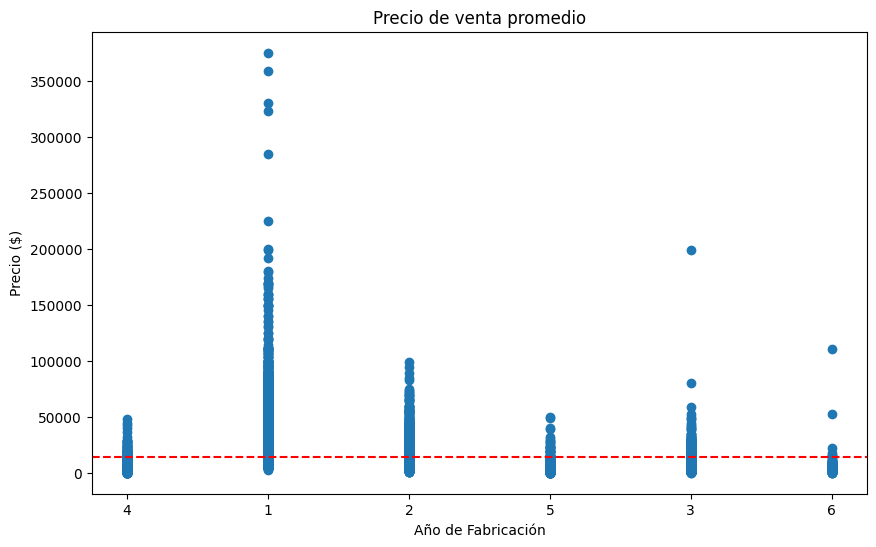

In [20]:
media = df_encoded['price'].mean()

plt.figure(figsize=(10, 6))

plt.scatter(df_encoded['ano_discretizado'], df_encoded['price'], label='Precio de venta')

plt.axhline(y=media, color='r', linestyle='--', label='Media del precio')

plt.xlabel("Año de Fabricación")

plt.ylabel("Precio ($)")

plt.title("Precio de venta promedio")

plt.show()

En el siguiente grafico de **Histograma** podremos visualizar la cantidad de autos publicados segun el año de fabricación y podemos ver que hay mayor cantidad a partir de los autos fabricados en el año 2017 al 2021.

Text(0, 0.5, 'Cantidad de autos Publicados')

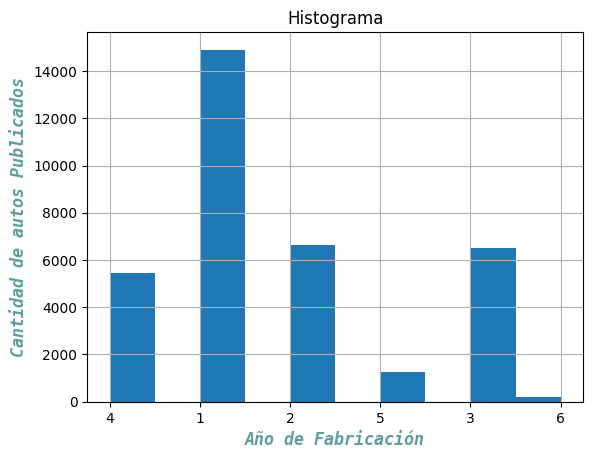

In [21]:
df_encoded['ano_discretizado'].hist()
fuenteejes = {'family': 'monospace', 'style': 'italic', 'weight':'bold', 'color':'cadetblue','size': 12}
plt.title('Histograma')
plt.xlabel('Año de Fabricación', fontdict=fuenteejes)
plt.ylabel('Cantidad de autos Publicados', fontdict=fuenteejes)

En ambos graficos podemos notar que tenemos una gran diferencia desde el año **1970 al 2000** por lo cual se puede decir que son outliers afectando nuestros datos, voy a eliminar este rango de fecha para tener una mejor apreciación de los datos.

In [22]:
Q1 = df_encoded['price'].quantile(0.25)
Q3 = df_encoded['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los valores fuera del rango intercuartil
outliers = df_encoded[(df_encoded['price'] < Q1 - 1.5 * IQR) | (df_encoded['price'] > Q3 + 1.5 * IQR)]

# Mostrar los outliers
outliers

,make,model,version,price,shift,fuel,doors,recorrido,ano_discretizado,make_encoded,model_encoded,version_encoded,shift_encoded,fuel_encoded,recorrido_encoded,ano_discretizado_encoded,is_professional_False,is_professional_True
59,MERCEDES-BENZ,Clase V,MERCEDES-BENZ Clase V 220 d Clase V Largo 4p.,44097,Automático,Diésel,4,muy bajo,1,4,145,5012,0,0,4,0,0,1
68,MERCEDES-BENZ,GLC Coupé,MERCEDES-BENZ GLC Coupe GLC 220 d 4MATIC 5p.,49900,Automático,Diésel,5,muy bajo,1,4,189,5046,0,0,4,0,0,1
78,BMW,Serie 2,BMW Serie 2 M2 2p.,48200,Automático,Gasolina,2,muy bajo,1,1,304,1585,0,4,4,0,1,0
90,MERCEDES-BENZ,CLA,MERCEDES-BENZ CLA CLA 200 D DCT 4p.,44600,Manual,Diésel,4,muy bajo,1,4,110,4150,1,0,4,0,0,1
100,MERCEDES-BENZ,GLC Coupé,MERCEDES-BENZ GLC Coupe MercedesAMG GLC 43 4MA...,89250,Automático,Gasolina,5,muy bajo,1,4,189,5054,0,4,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49707,AUDI,Q3 Sportback,AUDI Q3 Sportback RS 2.5 TFSI quattro 5p.,68900,Automático,Gasolina,5,muy bajo,1,0,269,1246,0,4,4,0,0,1
49748,AUDI,A6,AUDI A6 RS 6 Avant TFSI quattro 5p.,170000,Automático,Gasolina,5,muy bajo,1,0,58,1039,0,4,4,0,0,1
49869,BMW,Serie 2,BMW Serie 2 M2 2p.,46000,Automático,Gasolina,2,muy bajo,1,1,304,1585,0,4,4,0,0,1
49963,MERCEDES-BENZ,Clase G,MERCEDES-BENZ Clase G G 350 d 5p.,81995,Automático,Diésel,5,bajo,1,4,130,4808,0,0,1,0,0,1


In [23]:
# Calcula los cuartiles
Q1 = df_encoded['ano_discretizado_encoded'].quantile(0.30)
Q3 = df_encoded['ano_discretizado_encoded'].quantile(0.70)

# Calcula el rango intercuartil
IQR = Q3 - Q1

# Filtra los valores que están fuera del rango intercuartil
outliers_2 = df_encoded[(df_encoded['ano_discretizado_encoded'] < (Q1 - 1.5 * IQR)) | (df_encoded['ano_discretizado_encoded'] > (Q3 + 1.5 * IQR))]

outliers_2

,make,model,version,price,shift,fuel,doors,recorrido,ano_discretizado,make_encoded,model_encoded,version_encoded,shift_encoded,fuel_encoded,recorrido_encoded,ano_discretizado_encoded,is_professional_False,is_professional_True


In [24]:
# Calcula los cuartiles
Q1 = df_encoded['recorrido_encoded'].quantile(0.30)
Q3 = df_encoded['recorrido_encoded'].quantile(0.70)

# Calcula el rango intercuartil
IQR = Q3 - Q1

# Filtra los valores que están fuera del rango intercuartil
outliers_3 = df_encoded[(df_encoded['recorrido_encoded'] < (Q1 - 1.5 * IQR)) | (df_encoded['recorrido_encoded'] > (Q3 + 1.5 * IQR))]

outliers_3

,make,model,version,price,shift,fuel,doors,recorrido,ano_discretizado,make_encoded,model_encoded,version_encoded,shift_encoded,fuel_encoded,recorrido_encoded,ano_discretizado_encoded,is_professional_False,is_professional_True
8,CITROEN,Berlingo,CITROEN Berlingo Multispace 20 Aniv. PureTech ...,12100,Manual,Gasolina,5,muy bajo,1,2,83,2111,1,4,4,0,1,0
22,CITROEN,C3,CITROEN C3 PureTech 50KW 68CV FEEL 5p.,12490,Manual,Gasolina,5,muy bajo,1,2,94,2343,1,4,4,0,0,1
23,VOLKSWAGEN,Phaeton,VOLKSWAGEN Phaeton 5p.,3750,Automático,Diésel,5,muy bajo,3,9,263,10651,0,0,4,2,1,0
24,BMW,Serie 1,BMW Serie 1 116d 5p.,28900,Automático,Diésel,5,muy bajo,1,1,303,1502,0,0,4,0,0,1
29,FORD,Focus,FORD Focus 1.0 Ecoboost 92kW Trend 5p.,12790,Manual,Gasolina,5,muy bajo,1,3,183,3318,1,4,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49986,SEAT,Arona,SEAT Arona 1.0 TSI 70kW 95CV Style Go Eco 5p.,18646,Manual,Gasolina,5,muy bajo,1,8,74,8862,1,4,4,0,0,1
49988,VOLKSWAGEN,Tiguan,VOLKSWAGEN Tiguan Sport 2.0 TDI 110kW 150CV DS...,28900,Automático,Diésel,5,muy bajo,1,9,327,11001,0,0,4,0,0,1
49994,SEAT,León,SEAT Leon ST 1.6 TDI 85kW 115CV StSp Style Ed 5p.,18590,Manual,Diésel,5,muy bajo,1,8,234,9492,1,0,4,0,0,1
49997,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,Manual,Gasolina,5,muy bajo,1,6,5,6256,1,4,4,0,0,1


Despues de revisar los Data Frame pudimos encontrar los outliers que podrian afectar en el modelo, estos seran eliminados del Df y pudimos apreciar que los outliers del recorrido del auto no afectarian ya que estos se deben a los autos con menos kilometros recorridos, ejemplo: autos con poco uso a la venta.

In [25]:
# Definir los límites del rango intercuartílico (IQR)
Q1 = df_encoded['price'].quantile(0.25)
Q3 = df_encoded['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los valores dentro del rango intercuartílico
df_filtrado = df_encoded[(df_encoded['price'] >= Q1 - 1.5 * IQR) & (df_encoded['price'] <= Q3 + 1.5 * IQR)]

# El dataframe df_filtrado ahora contiene los valores sin outliers

In [26]:
df_filtrado

,make,model,version,price,shift,fuel,doors,recorrido,ano_discretizado,make_encoded,model_encoded,version_encoded,shift_encoded,fuel_encoded,recorrido_encoded,ano_discretizado_encoded,is_professional_False,is_professional_True
0,SEAT,Toledo,SEAT Toledo 4p.,950,Manual,Diésel,4,medio,4,8,329,9602,1,0,2,3,1,0
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Manual,Gasolina,5,bajo,1,2,92,2195,1,4,1,0,0,1
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Manual,Diésel,4,bajo,1,3,337,4053,1,0,1,0,0,1
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Manual,Diésel,4,bajo,2,9,119,9847,1,0,1,1,0,1
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Manual,Diésel,2,bajo,1,3,336,4014,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,SEAT,León,SEAT Leon ST 1.8 TSI 132kW 180CV StSp FR Plus 5p.,19490,Manual,Gasolina,5,bajo,1,8,234,9497,1,4,1,0,0,1
49994,SEAT,León,SEAT Leon ST 1.6 TDI 85kW 115CV StSp Style Ed 5p.,18590,Manual,Diésel,5,muy bajo,1,8,234,9492,1,0,4,0,0,1
49996,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,Manual,Diésel,2,bajo,2,7,232,8010,1,0,1,1,0,1
49997,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,Manual,Gasolina,5,muy bajo,1,6,5,6256,1,4,4,0,0,1


Al realizar la eliminacion de los outliers podemos ver que nos quedan **33.639 Filas**  y **18 columnas** para comenzar con el modelo.

# **Story Telling**

A continuación vamos a ver que auto es el mas publicado segun su **tipo de cambio**, esto nos lleva a verlo graficamente:

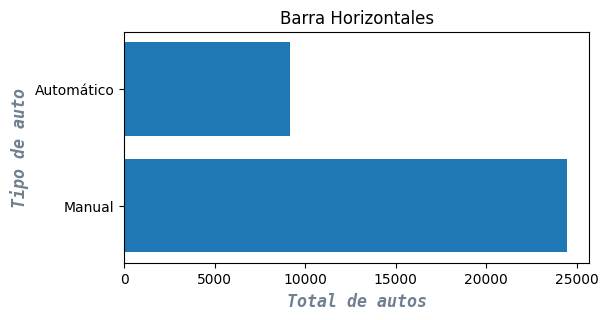

In [27]:
x= df_filtrado['shift'].unique()
y= df_filtrado['shift'].value_counts().tolist()

fig, ax = plt.subplots(figsize=(6,3))
ax.barh(x, y)

fuenteejes = {'family': 'monospace', 'style': 'italic', 'weight':'bold', 'color':'slategrey','size': 12} #Estilo de titulos
ax.set_title('Barra Horizontales')
ax.set_ylabel('Tipo de auto', fontdict=fuenteejes)
ax.set_xlabel('Total de autos', fontdict=fuenteejes)

plt.show()

Despues de observar el grafico podemos ver que el auto mas publicado es el de tipo de **cambio manual**

Como pudimos ver en el grafico anterior los autos con mayor precio de venta son los que tienen **menos años de Fabricacion** pero vamos a ver ahora como influye el modelo del auto segun las puertas del vehiculo.

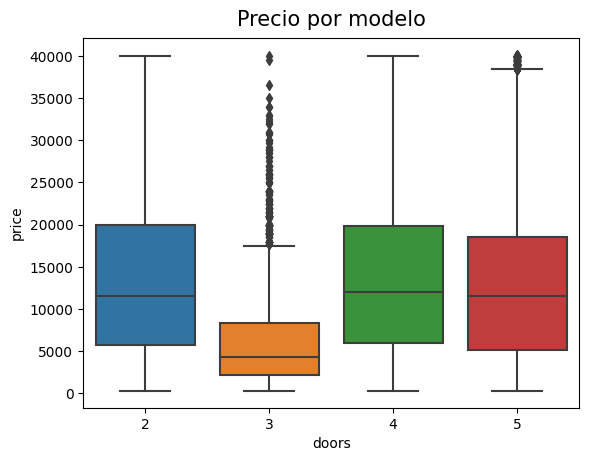

In [ ]:
sns.boxplot(x='doors', y = 'price', data = df_filtrado)
plt.title("Precio por modelo", fontsize=15, verticalalignment='bottom');

En el **Boxplot** anterior podemos ver que los vehiculos de 2 puertas tienen un mayor valor en cuanto a precio se refiere y el costo es mucho menor cuando son autos de 3 puertas.

In [31]:
text = " ".join(review for review in df_1.make)

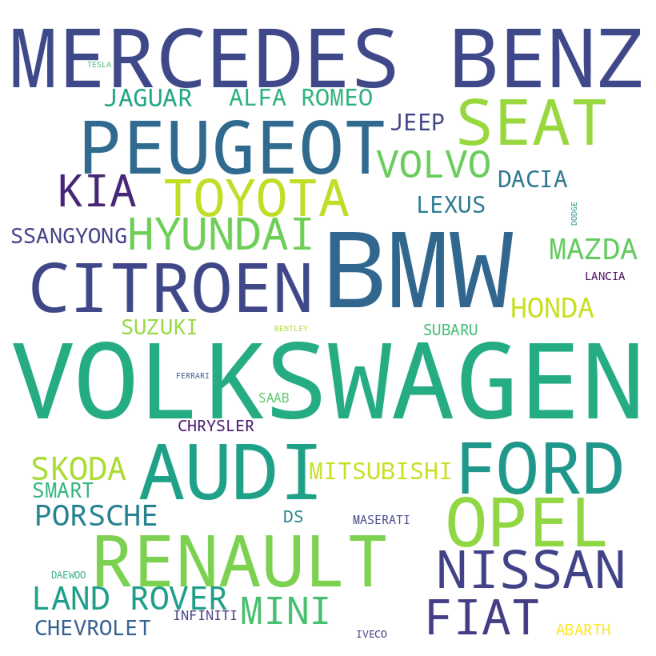

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

En el siguiente gráfico **Scatter** podremos visualizar los kilometros que tienen los autos de acuerdo al año de fabricación, podemos observar que los autos con mas kilometros recorridos son los que estan entre el año 1998 y 2014

Text(0, 0.5, 'Kilometros recorridos')

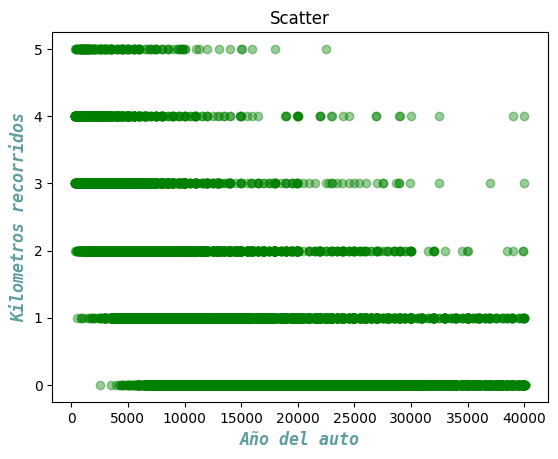

In [ ]:
plt.scatter(df_filtrado['price'],df_filtrado['ano_discretizado_encoded'], alpha=0.4, color = 'green')
fuenteejes = {'family': 'monospace', 'style': 'italic', 'weight':'bold', 'color':'cadetblue','size': 12}
plt.title('Scatter')
plt.xlabel('Año del auto', fontdict=fuenteejes)
plt.ylabel('Kilometros recorridos', fontdict=fuenteejes)

# **Construccion y entrenamiento del modelo**

### **Forward Selection**

In [72]:
# Variables predictoras
predictors = df_filtrado.drop(['price', 'make',	'model',	'version', 'shift',	'fuel', 'recorrido',	'ano_discretizado'], axis=1)

# Variable objetivo
target = df_filtrado['price']

# Forward selection
selected_vars = []  # Lista para almacenar las variables seleccionadas

while len(predictors.columns) > 0:
    p_values = []
    for col in predictors.columns:
        X = sm.add_constant(df_filtrado[selected_vars + [col]])
        model = sm.OLS(target, X).fit()
        p_values.append((col, model.pvalues[col]))

    best_variable, p_value = sorted(p_values, key=lambda x: x[1])[0]
    if p_value < 0.05:  # Prueba de significancia (p < 0.05)
        selected_vars.append(best_variable)
        predictors = predictors.drop(best_variable, axis=1)
    else:
        break

print("Variables seleccionadas:", selected_vars)

Variables seleccionadas: ['shift_encoded', 'recorrido_encoded', 'ano_discretizado_encoded', 'make_encoded', 'version_encoded', 'doors', 'is_professional_False', 'is_professional_True', 'fuel_encoded', 'model_encoded']


In [ ]:
df_filtrado.corr()

<ipython-input-67-c5690163b6b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filtrado.corr()


,price,doors,make_encoded,model_encoded,version_encoded,shift_encoded,fuel_encoded,recorrido_encoded,ano_discretizado_encoded,is_professional_False,is_professional_True
price,1.000000,0.099982,-0.142690,0.061669,-0.111202,-0.474413,0.021542,0.389455,-0.703196,-0.494568,0.494568
doors,0.099982,1.000000,0.080009,-0.017087,0.081362,-0.003765,-0.102856,0.128821,-0.265858,-0.168648,0.168648
make_encoded,-0.142690,0.080009,1.000000,0.048181,0.992711,0.195894,0.066239,0.057886,-0.007463,-0.014174,0.014174
model_encoded,0.061669,-0.017087,0.048181,1.000000,0.118512,-0.049477,-0.080436,-0.054873,0.045335,0.034496,-0.034496
version_encoded,-0.111202,0.081362,0.992711,0.118512,1.000000,0.172836,0.053519,0.053445,-0.019795,-0.031021,0.031021
shift_encoded,-0.474413,-0.003765,0.195894,-0.049477,0.172836,1.000000,0.042167,-0.040803,0.167943,0.112506,-0.112506
fuel_encoded,0.021542,-0.102856,0.066239,-0.080436,0.053519,0.042167,1.000000,0.233927,0.005218,-0.037085,0.037085
recorrido_encoded,0.389455,0.128821,0.057886,-0.054873,0.053445,-0.040803,0.233927,1.000000,-0.378489,-0.260321,0.260321
ano_discretizado_encoded,-0.703196,-0.265858,-0.007463,0.045335,-0.019795,0.167943,0.005218,-0.378489,1.000000,0.623260,-0.623260
is_professional_False,-0.494568,-0.168648,-0.014174,0.034496,-0.031021,0.112506,-0.037085,-0.260321,0.623260,1.000000,-1.000000


### ¿Que variables son las que mas importan?


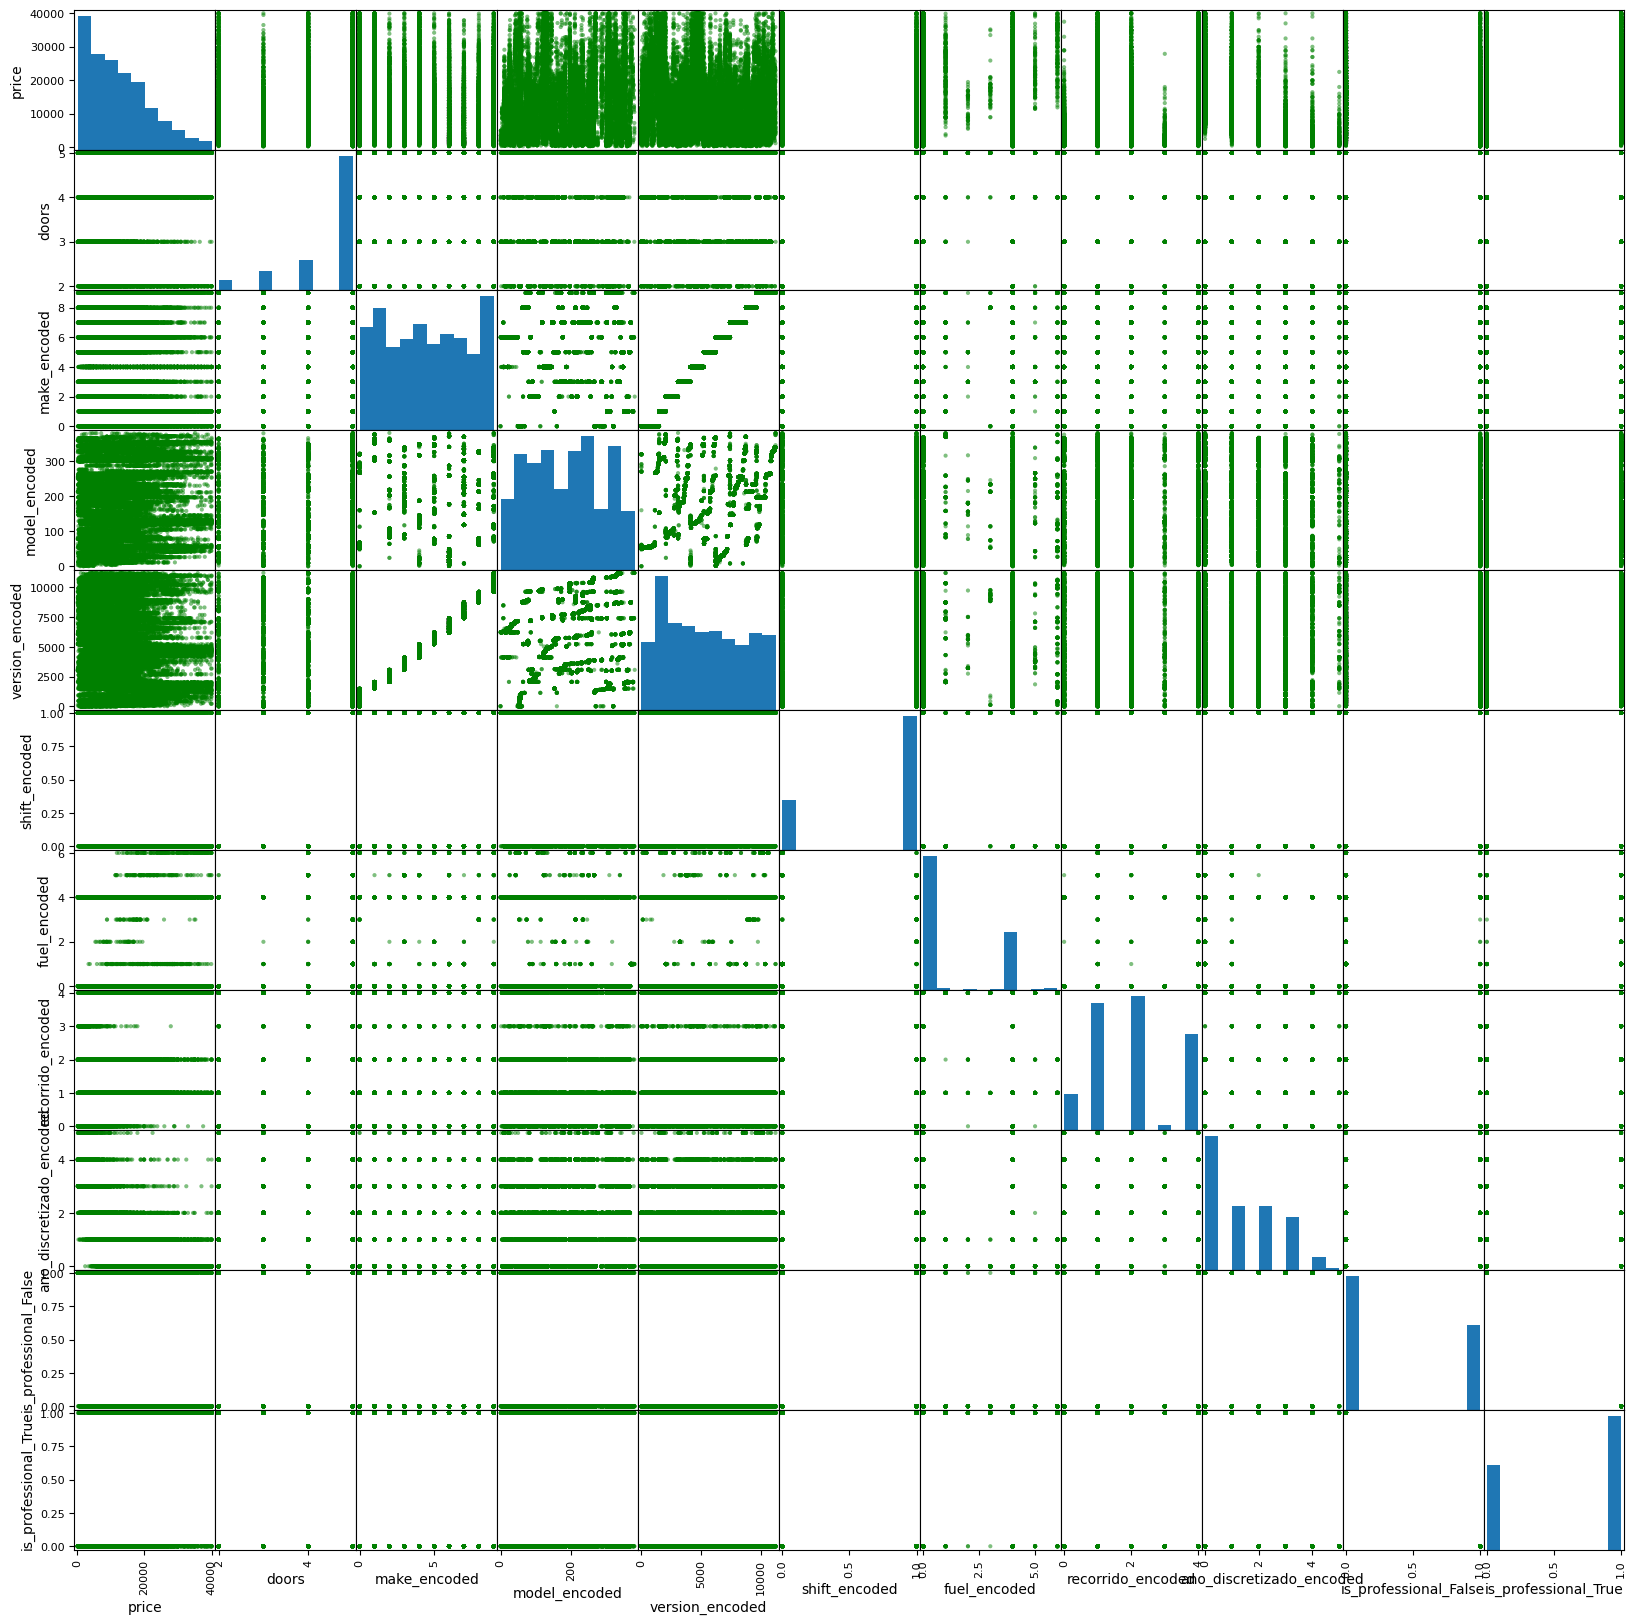

In [52]:
pd.plotting.scatter_matrix(df_filtrado, figsize=(20,20), color='green')
plt.show()

In [43]:
X = df_filtrado.drop(['price', 'make',	'model',	'version', 'shift',	'fuel', 'recorrido',	'ano_discretizado'], axis=1)
y = df_filtrado['price']

In [44]:
y.value_counts()

2500     412
3500     388
1500     366
2000     342
4500     332
        ... 
14815      1
25110      1
9640       1
14295      1
18646      1
Name: price, Length: 2147, dtype: int64

# **Cross Validation**

### **Desarrollamos el modelo con Sklearn**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
resultado = modelo.score(X_test, y_test)
print(resultado)

0.06787554498612762


### **Validación cruzada con K-Fold**

In [47]:
modelo = DecisionTreeClassifier()
kfold_validacion = KFold(10)

In [49]:
resultados = cross_val_score(modelo, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean()

[0.06837099 0.07877527 0.06777646 0.07699168 0.07342449 0.08085612
 0.08263971 0.078478   0.07818074 0.07077015]


0.07562636058697096

### **Pipeline**

In [75]:
preprocessor = StandardScaler()
model = LogisticRegression()

#Construir el pipeline combinando los pasos y el modelo
pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])

#Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

#Utilizar el pipeline para hacer predicciones en los datos de prueba
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Análisis de componentes principales (PCA)**

In [54]:
# Normalizar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [56]:
# Obtener la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_cumulative = explained_variance_ratio.cumsum()

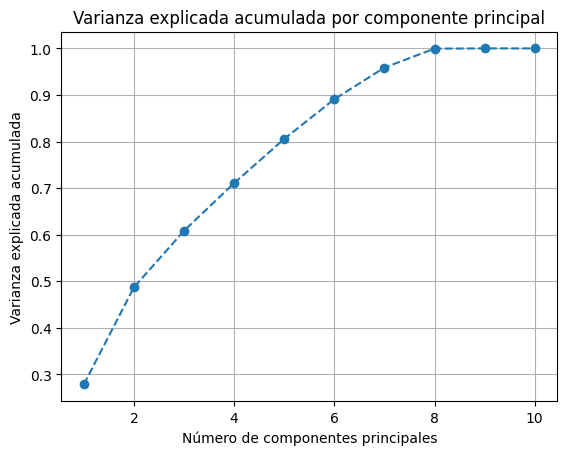

In [58]:
# Graficar la varianza explicada acumulada
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por componente principal')
plt.grid(True)
plt.show()



In [60]:
# Seleccionar el número de componentes principales a utilizar
n_components = 8

In [61]:
# Reducir la dimensionalidad a través del PCA
X_selected = X_pca[:, :n_components]


In [62]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [63]:
# Crear el modelo de XGBoost
model = xgb.XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.01, max_depth= 3, n_estimators= 500, subsample= 1.0)

In [64]:
# Entrenar el modelo
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [65]:
# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [66]:
# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [67]:
# Calcular las métricas de evaluación en los datos de entrenamiento
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calcular las métricas de evaluación en los datos de prueba
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)



In [68]:
# Imprimir las métricas
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_train)
print('MAE:', mae_train)
print('\nMétricas en los datos de prueba:')
print('R²:', r2_test)
print('MAE:', mae_test)

Métricas en los datos de entrenamiento:
R²: 0.7513701838626103
MAE: 3295.6718880548237

Métricas en los datos de prueba:
R²: 0.7419305994490997
MAE: 3359.447735581188
